In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
fs_df = pd.read_pickle('../data/fs_df.pkl')
cs5_df = pd.read_pickle('../data/cs5_df.pkl')
cs6_df = pd.read_pickle('../data/cs6_df.pkl')
fs_df = fs_df.drop(columns=['REQMEM','REQTIME'])

In [ ]:
fs_ts = pd.Series(1, index=list(fs_df['END']))
cs5_ts = pd.Series(list(cs5_df['RETURNCODE']), index=list(cs5_df['TIME']))
cs6_ts = pd.Series(list(cs6_df['RETURNCODE']), index=list(cs6_df['TIME']))

In [ ]:
resample_interval = 'D'
fs_resample = fs_ts.resample(resample_interval).count() #.to_frame().cumsum()
cs5_resample = cs5_ts.resample(resample_interval).sum()
cs6_resample = cs6_ts.resample(resample_interval).sum()
cs_resample = cs5_resample + cs6_resample

In [56]:
resample_df = fs_resample.to_frame().join(cs_resample.to_frame(), lsuffix='_fs', rsuffix='_cs').dropna()

In [65]:
y=resample_df['0_cs']
X=resample_df['0_fs']
model = sm.OLS(y, X).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   0_cs   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                              52.64
Date:                Tue, 26 Oct 2021   Prob (F-statistic):                    2.52e-12
Time:                        12:57:49   Log-Likelihood:                         -1543.0
No. Observations:                 357   AIC:                                      3088.
Df Residuals:                     356   BIC:                                      3092.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0_fs           0.0003   3.84e-05      7.256      0.000       0.000       0.000
==============================================================================
Omnibus:                      284.735   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4338.549
Skew:                           3.327   Prob(JB):                         0.00
Kurtosis:                      18.729   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

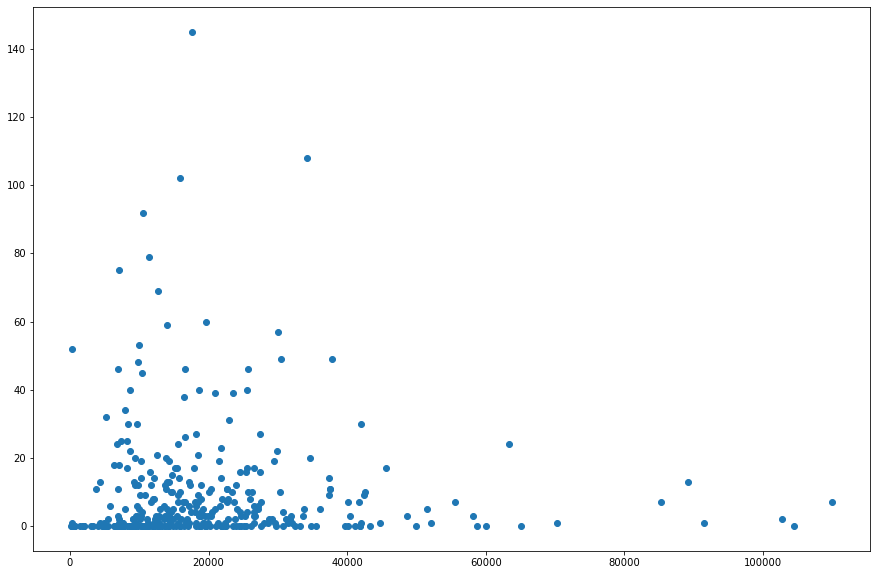

In [69]:
plt.figure(figsize=(15, 10))
plt.scatter(resample_df['0_fs'], resample_df['0_cs'])